In [1]:
import torch

import matplotlib
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams[
    "text.latex.preamble"
] = r"\usepackage{amsmath}\usepackage{amssymb}\usepackage{color}"

In [2]:
tkwargs = {"dtype": torch.double, "device": "cpu"}
y = torch.tensor([[0.8, 0.5]], **tkwargs)
up = torch.tensor([[-1, y[0, 1]]], **tkwargs)
low = torch.tensor([[y[0, 0], -1]], **tkwargs)
ell = torch.row_stack([up, y, low])

nadir = torch.zeros(1, 2, **tkwargs)
w = torch.tensor([[0.55, 0.45]], **tkwargs)
t = torch.linspace(-2, 2, 1001).unsqueeze(-1)

line = nadir + t * w

u = torch.linspace(-1, 1, 1001)
r = 0.39
c = [0.3, 0.25]
circle_up = torch.sqrt(1 - torch.pow(u, 2))
circle_lo = -torch.sqrt(1 - torch.pow(u, 2))

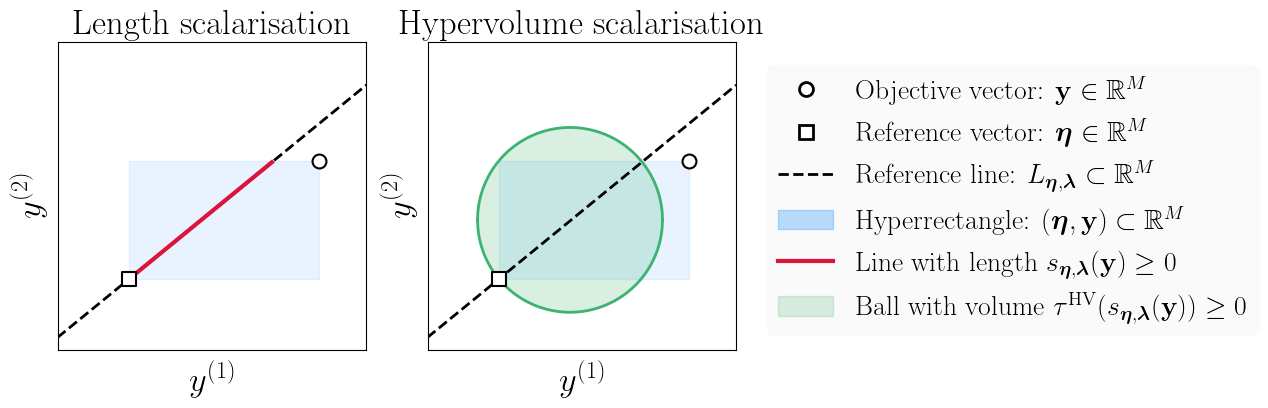

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(8.75, 4))

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.scatter(
        y[:, 0],
        y[:, 1],
        color="w",
        marker="o",
        linestyle="None",
        s=100,
        edgecolors="k",
        linewidth=1.5,
    )
    plt.fill_between(
        [nadir[0, 0], y[0, 0]],
        [nadir[0, 1], nadir[0, 1]],
        [y[0, 1], y[0, 1]],
        color="dodgerblue",
        alpha=0.1,
        zorder=0,
    )
    plt.scatter(
        nadir[:, 0],
        nadir[:, 1],
        color="w",
        marker="s",
        linestyle="None",
        s=100,
        edgecolors="k",
        linewidth=1.5,
        zorder=5,
    )

    plt.plot(
        line[:, 0],
        line[:, 1],
        color="k",
        linestyle="--",
        linewidth=2,
    )
    plt.xlim(-0.3, 1)
    plt.ylim(-0.3, 1)
    plt.xlabel(r"$y^{(1)}$", fontsize=25)
    plt.ylabel(r"$y^{(2)}$", fontsize=25)
    plt.xticks([])
    plt.yticks([])

########################################################################################
# Length scalarization.
plt.subplot(1, 2, 1)
plt.plot(
    line[500:775, 0], line[500:775, 1], color="crimson", linestyle="-", linewidth=3
)
plt.title("Length scalarisation", fontsize=25)

########################################################################################
# Hypervolume scalarization.
plt.subplot(1, 2, 2)
plt.plot(c[0] + u * r, c[1] + r * circle_up, color="mediumseagreen", linewidth=2)
plt.plot(c[0] + u * r, c[1] + r * circle_lo, color="mediumseagreen", linewidth=2)
plt.fill_between(
    c[0] + u * r,
    c[1] + r * circle_up,
    c[1] + r * circle_lo,
    color="mediumseagreen",
    alpha=0.2,
)
plt.title("Hypervolume scalarisation", fontsize=25)

########################################################################################
# Legend.
green_patch = mpatches.Patch(
    color="mediumseagreen",
    label=r"Ball with volume $\tau^{\text{HV}}(s_{\boldsymbol{\eta}, \boldsymbol{\lambda}}(\mathbf{y})) \geq 0$",
    alpha=0.2,
)
blue_patch = mpatches.Patch(
    color="dodgerblue",
    label=r"Hyperrectangle: $(\boldsymbol{\eta}, \mathbf{y}) \subset \mathbb{R}^M$",
    alpha=0.3,
)
black_dot = mlines.Line2D(
    [],
    [],
    color="w",
    marker="o",
    linestyle="None",
    markersize=10,
    markeredgecolor="k",
    markeredgewidth=2,
    label=r"Objective vector: $\mathbf{y} \in \mathbb{R}^M$",
)

white_square = mlines.Line2D(
    [],
    [],
    color="w",
    marker="s",
    linestyle="None",
    markersize=10,
    markeredgecolor="k",
    markeredgewidth=2,
    label=r"Reference vector: $\boldsymbol{\eta} \in \mathbb{R}^M$",
)

red_line = mlines.Line2D(
    [],
    [],
    color="crimson",
    linestyle="-",
    label=r"Line with length $s_{\boldsymbol{\eta}, \boldsymbol{\lambda}}(\mathbf{y}) \geq 0$",
    linewidth=3,
)

black_line = mlines.Line2D(
    [],
    [],
    color="k",
    linestyle="--",
    label=r"Reference line: $L_{\boldsymbol{\eta}, \boldsymbol{\lambda}} \subset \mathbb{R}^M$",
    linewidth=2,
)


axes[1].legend(
    handles=[
        black_dot,
        white_square,
        black_line,
        blue_patch,
        red_line,
        green_patch,
    ],
    ncol=1,
    fontsize=20,
    loc=(1.1, 0.05),
    facecolor="k",
    framealpha=0.02,
)

plt.show()